In [16]:
import fastbook
fastbook.setup_book()
from fastbook import *

In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [2]:
Path.BASE_PATH = path

In [3]:
print(path)

/home/mzums/.fastai/data/oxford-iiit-pet


In [4]:
path.ls()

(#2) [Path('annotations'),Path('images')]

In [5]:
(path/"images").ls()

(#7393) [Path('images/english_setter_2.jpg'),Path('images/basset_hound_50.jpg'),Path('images/american_pit_bull_terrier_107.jpg'),Path('images/american_bulldog_82.jpg'),Path('images/yorkshire_terrier_21.jpg'),Path('images/Abyssinian_33.jpg'),Path('images/leonberger_155.jpg'),Path('images/Bombay_139.jpg'),Path('images/japanese_chin_111.jpg'),Path('images/keeshond_195.jpg')...]

In [6]:
fname = (path/"images").ls()[0]

In [7]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['english_setter']

In [8]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

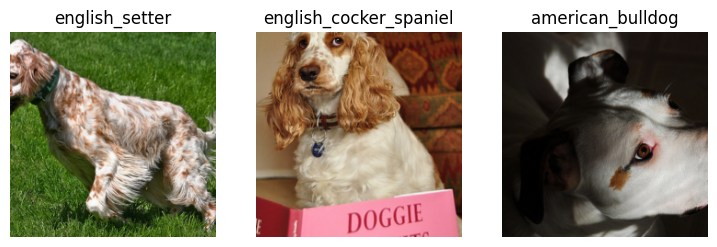

In [9]:
dls.show_batch(nrows=1, ncols=3)

In [10]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,1.535596,0.311858,0.106901,23:56


epoch,train_loss,valid_loss,error_rate,time
0,0.517785,0.282049,0.086604,35:27
1,0.323486,0.206255,0.068336,35:23


In [11]:
x,y = dls.one_batch()

In [12]:
y

TensorCategory([19, 36, 17, 32, 21, 15, 13,  7, 20, 22, 19, 31, 17, 31, 21,  5,
                11,  4, 20, 28, 26, 11, 22,  4,  0,  2, 19,  4, 14,  0,  9,  1,
                10, 28,  2,  7, 22, 27,  2, 30, 29,  7,  3,  0, 21, 22, 10, 29,
                 2, 11,  2, 11, 24,  8,  6, 13, 11,  3, 35, 21, 25, 21,  4, 28])

In [13]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([3.8344e-08, 6.8711e-06, 3.5091e-06, 1.1826e-06, 2.3104e-07, 7.2698e-05,
        3.1203e-05, 5.8712e-07, 4.7097e-06, 1.2005e-07, 8.9492e-08, 1.4752e-06,
        7.7424e-06, 5.4609e-06, 3.3985e-06, 9.4772e-06, 1.6186e-06, 1.5972e-07,
        2.5504e-05, 9.9976e-01, 1.2754e-05, 8.2042e-07, 1.2973e-06, 1.2637e-05,
        5.0119e-06, 9.5655e-07, 3.9608e-07, 1.8110e-06, 6.2993e-07, 5.2957e-07,
        1.5789e-05, 4.0820e-07, 2.1974e-07, 5.5255e-08, 4.8022e-07, 1.3731e-07,
        1.1944e-05])

In [14]:
len(preds[0]),preds[0].sum()

(37, tensor(1.))

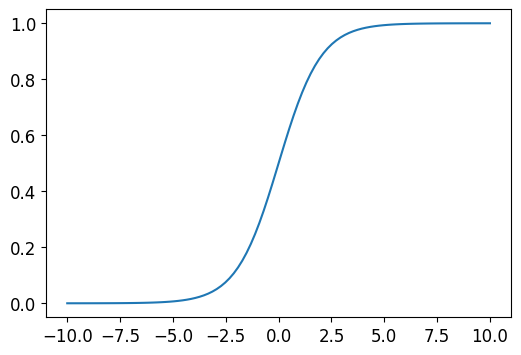

In [18]:
plot_function(torch.sigmoid, min=-10,max=10)

In [19]:
torch.random.manual_seed(42);

In [20]:
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6734,  0.2576],
        [ 0.4689,  0.4607],
        [-2.2457, -0.3727],
        [ 4.4164, -1.2760],
        [ 0.9233,  0.5347],
        [ 1.0698,  1.6187]])

In [21]:
acts.sigmoid()

tensor([[0.6623, 0.5641],
        [0.6151, 0.6132],
        [0.0957, 0.4079],
        [0.9881, 0.2182],
        [0.7157, 0.6306],
        [0.7446, 0.8346]])

In [22]:
(acts[:,0]-acts[:,1]).sigmoid()

tensor([0.6025, 0.5021, 0.1332, 0.9966, 0.5959, 0.3661])

In [23]:
def softmax(x): return exp(x) / exp(x).sum(dim=1, keepdim=True)